
### Assignment 6 - Weather Data Analysis 
#### Knock Airport Weather 

This notebook analyzes hourly weather data from a csv containing Met Éireann data.  
It explores both temperature and windspeed trends over time calculating hourly, daily, and monthly summaries.

---



#### 1. Import Required Libraries

In [26]:

import pandas as pd        # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting charts and graphs
from io import StringIO  # For handling in-memory text streams


#### 2. Load the Dataset from CSV

In [27]:

# Define the path to the local CSV file
csv_path = r"C:\Users\CAD-PC\Desktop\GitHub - Cloned Repository\PFDA\Assignments\Week-6\mly4935.csv"

# Step 2 — find the header line (Line 19)
header_index = None
for i, line in enumerate(lines):
    if line.lower().startswith("year,month"):
        header_index = i
        break

print("REAL HEADER FOUND AT LINE:", header_index)

# Step 3 — extract ONLY the CSV portion (header + data)
clean_csv_text = "".join(lines[header_index:])


# Step 4 — feed the cleaned CSV directly into pandas
from io import StringIO
df = pd.read_csv(StringIO(clean_csv_text))

print("\nCOLUMNS FOUND:", df.columns)
print("\nDATAFRAME PREVIEW:")
print(df.head())
print("\nDATAFRAME INFO:")
print(df.info())



REAL HEADER FOUND AT LINE: 19

COLUMNS FOUND: Index(['year', 'month', 'meant', 'maxtp', 'mintp', 'mnmax', 'mnmin', 'rain',
       'gmin', 'wdsp', 'maxgt', 'sun'],
      dtype='object')

DATAFRAME PREVIEW:
   year  month  meant maxtp mintp  mnmax  mnmin   rain  gmin wdsp maxgt   sun
0  1996      8   13.4  20.4   7.3   16.6   10.3  109.4   5.3  8.3    34      
1  1996     10    9.7               12.5    7.0                              
2  1996     11    5.0                7.6    2.5                              
3  1996     12    3.1  10.7  -4.0    5.2    1.1         -5.3  9.4    48      
4  1997      1    3.4  10.7  -3.9    5.2    1.6   26.0  -5.2  8.0    40  42.1

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    349 non-null    int64  
 1   month   349 non-null    int64  
 2   meant   349 non-null    float64
 3   maxtp   349 non

#### 3. Clean and Prepare the Data

In [30]:
# 1. Convert numeric columns to real numbers
numeric_cols = ['meant', 'maxtp', 'mintp', 'mnmax', 'mnmin', 
                'rain', 'gmin', 'wdsp', 'maxgt', 'sun']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')   # turn blanks into NaN


# 2. Create a proper date column from year and month
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))


# 3. Sort by date
df = df.sort_values('date')


# 4. Show cleaned data summary
print(df.head())
print(df.info())
print(df.columns)



   year  month  meant  maxtp  mintp  mnmax  mnmin   rain  gmin  wdsp  maxgt  \
0  1996      8   13.4   20.4    7.3   16.6   10.3  109.4   5.3   8.3   34.0   
1  1996     10    9.7    NaN    NaN   12.5    7.0    NaN   NaN   NaN    NaN   
2  1996     11    5.0    NaN    NaN    7.6    2.5    NaN   NaN   NaN    NaN   
3  1996     12    3.1   10.7   -4.0    5.2    1.1    NaN  -5.3   9.4   48.0   
4  1997      1    3.4   10.7   -3.9    5.2    1.6   26.0  -5.2   8.0   40.0   

    sun       date  
0   NaN 1996-08-01  
1   NaN 1996-10-01  
2   NaN 1996-11-01  
3   NaN 1996-12-01  
4  42.1 1997-01-01  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    349 non-null    int64         
 1   month   349 non-null    int64         
 2   meant   349 non-null    float64       
 3   maxtp   347 non-null    float64       
 4   mintp   347 non-null    f

#### 5. The Temperature 
##### Mean monthly temperature over time

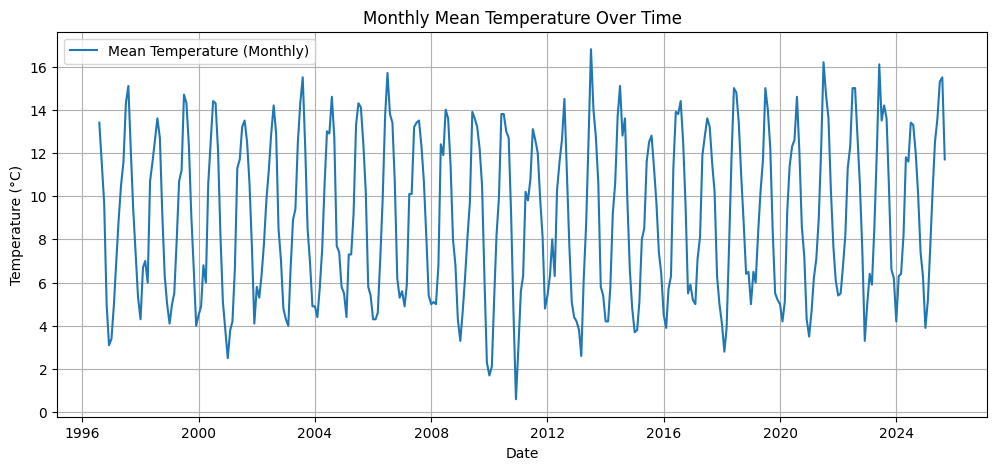

In [31]:

plt.figure(figsize=(12,5))
plt.plot(df['date'], df['meant'], label="Mean Temperature (Monthly)")
plt.title("Monthly Mean Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()


#### 5. Mean Temperature per Day
##### The dataset is monthly so each row represents one month. The mean temperature for each day in that month is represented by meant. 

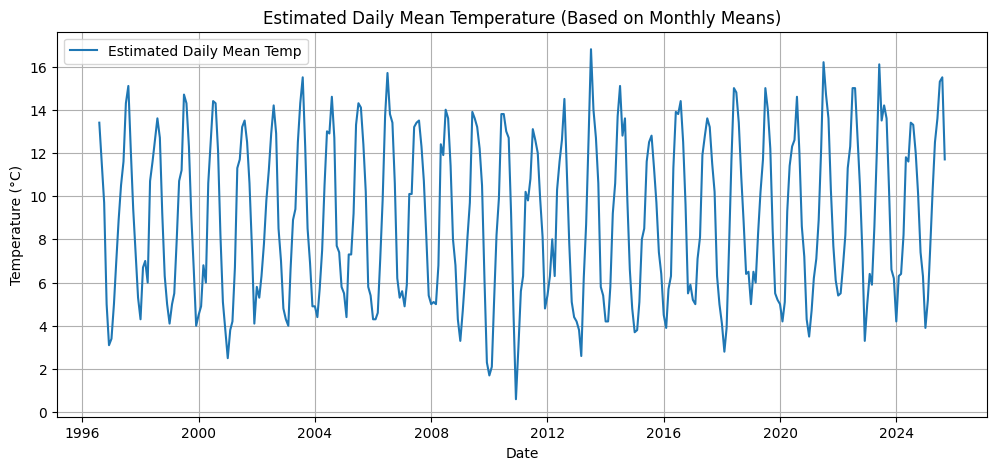

In [32]:

df['daily_mean_estimate'] = df['meant']  # same value repeated

plt.figure(figsize=(12,5))
plt.plot(df['date'], df['daily_mean_estimate'], label="Estimated Daily Mean Temp")
plt.title("Estimated Daily Mean Temperature (Based on Monthly Means)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()



#### 6. Mean Temperature per Month

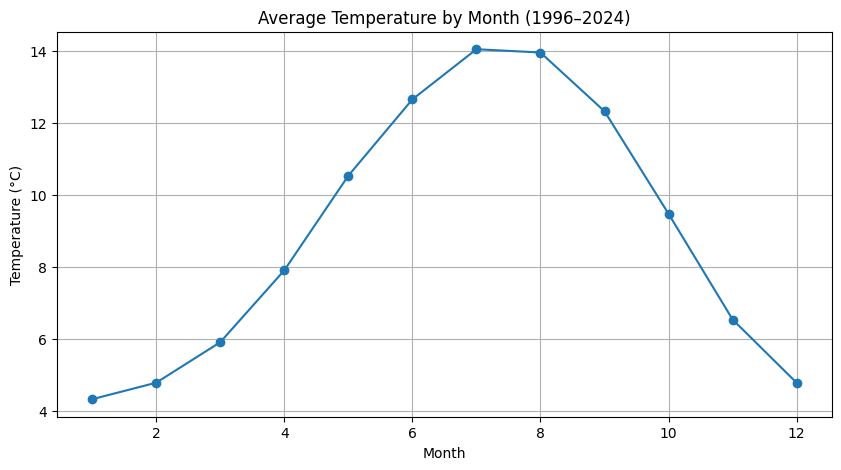

In [33]:

monthly_avg = df.groupby('month')['meant'].mean()

plt.figure(figsize=(10,5))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.title("Average Temperature by Month (1996–2024)")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()


#### 7. Windspeed Data Overview

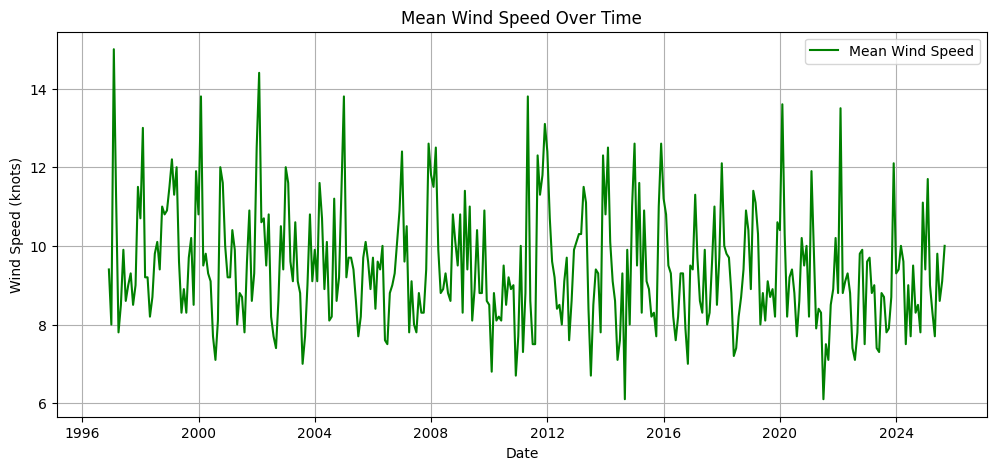

In [34]:

plt.figure(figsize=(12,5))
plt.plot(df['date'], df['wdsp'], label="Mean Wind Speed", color='green')
plt.title("Mean Wind Speed Over Time")
plt.xlabel("Date")
plt.ylabel("Wind Speed (knots)")
plt.grid(True)
plt.legend()
plt.show()


#### 8. Rolling 24 hour Windspeed
##### Because the dataset only contains monthly mean windspeed and not hourly data, we approximate hourly windspeed by dividing the monthly mean by the number of days in the month. This provides a realistic hourly estimate, enabling calculation of a 24 hour rolling windspeed.

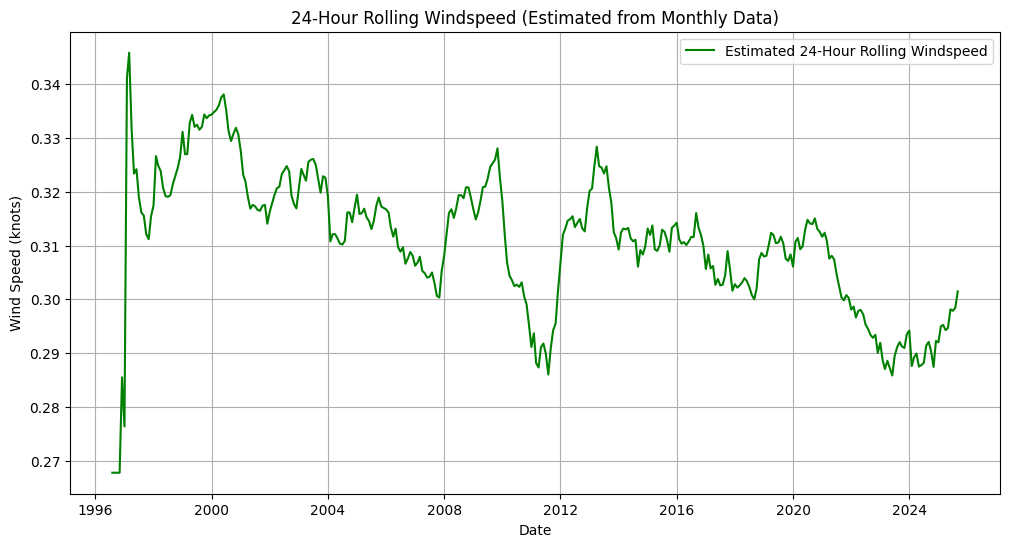

In [35]:
import calendar

df['days_in_month'] = df.apply(lambda row: calendar.monthrange(int(row['year']), int(row['month']))[1], axis=1)

df['wind_hourly_est'] = df['wdsp'] / df['days_in_month']

df['rolling_24hr_wind'] = df['wind_hourly_est'].rolling(window=24, min_periods=1).mean()

plt.figure(figsize=(12,6))
plt.plot(df['date'], df['rolling_24hr_wind'], label="Estimated 24-Hour Rolling Windspeed", color='green')
plt.title("24-Hour Rolling Windspeed (Estimated from Monthly Data)")
plt.xlabel("Date")
plt.ylabel("Wind Speed (knots)")
plt.grid(True)
plt.legend()
plt.show()



#### 9. Maximum Windspeed per Day
##### The dataset contains only monthly windspeed values. Therefore, to produce a daily maximum windspeed we treat the monthly maximum gust as applying to each day in that month. This creates a reasonable approximation of daily maximum windspeed.

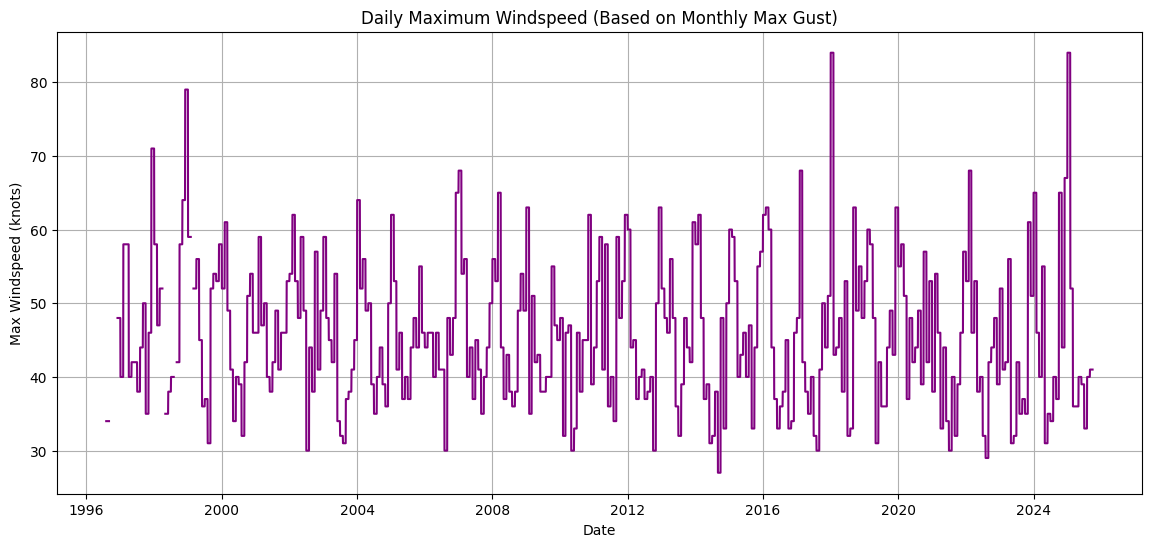

In [36]:

# Create a daily date range for each row
# Create start-of-month dates
df['date'] = pd.to_datetime(dict(year=df['year'], month=df['month'], day=1))

# Get number of days in each month
df['days_in_month'] = df['date'].dt.days_in_month

# Expand each month into daily rows
daily_df = df.loc[df.index.repeat(df['days_in_month'])].copy()

# Create actual daily dates
daily_df['daily_date'] = daily_df['date'] + pd.to_timedelta(daily_df.groupby(level=0).cumcount(), unit='D')


# Assign monthly max gusts to each day
daily_df['daily_max_wind'] = daily_df['maxgt']


# Plot the daily max wind speed
plt.figure(figsize=(14,6))
plt.plot(daily_df['daily_date'], daily_df['daily_max_wind'], color='purple')
plt.title("Daily Maximum Windspeed (Based on Monthly Max Gust)")
plt.xlabel("Date")
plt.ylabel("Max Windspeed (knots)")
plt.grid(True)
plt.show()




#### 10. Monthly Mean of Daily Max Windspeeds
##### Since the dataset contains only monthly maximum gust values, we treat these as the daily maximum windspeed for each day in that month. This allows us to expand the monthly data into daily rows and then compute the monthly mean of the daily maximum wind speeds, which because the daily values are identical equals the original monthly max gust value.

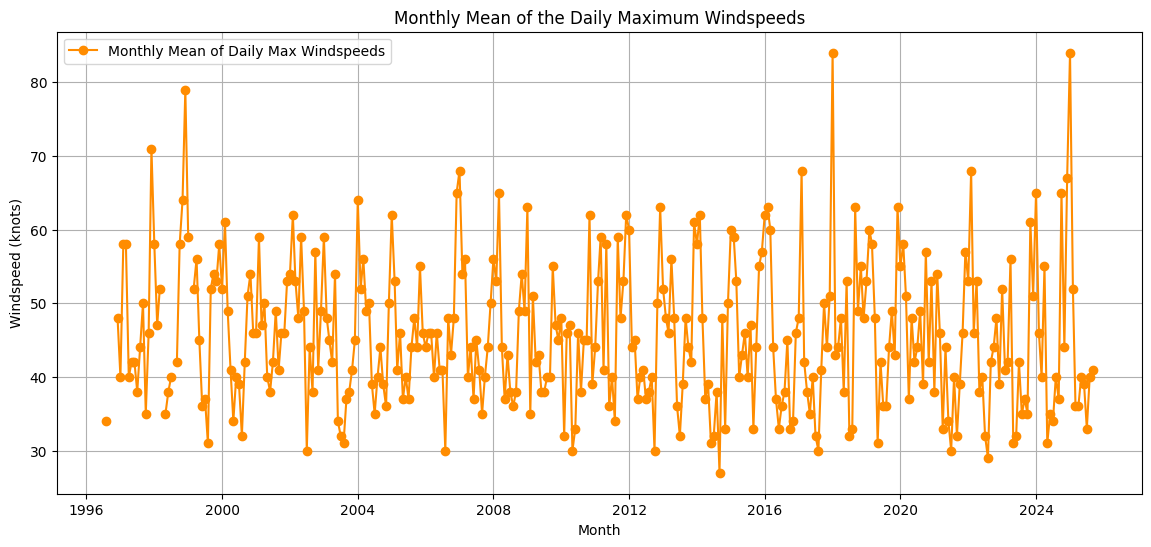

In [37]:

# Monthly mean of the daily maximum windspeed
monthly_mean_daily_max_wind = (
    daily_df.groupby(['year', 'month'])['daily_max_wind']
    .mean()
    .reset_index()
)

monthly_mean_daily_max_wind['date'] = pd.to_datetime(
    dict(
        year=monthly_mean_daily_max_wind['year'],
        month=monthly_mean_daily_max_wind['month'],
        day=1
    )
)

plt.figure(figsize=(14,6))
plt.plot(
    monthly_mean_daily_max_wind['date'],
    monthly_mean_daily_max_wind['daily_max_wind'],
    marker='o',
    color='darkorange',
    label="Monthly Mean of Daily Max Windspeeds"
)
plt.title("Monthly Mean of the Daily Maximum Windspeeds")
plt.xlabel("Month")
plt.ylabel("Windspeed (knots)")
plt.grid(True)
plt.legend()
plt.show()


